In [27]:
from matplotlib import pyplot as plt
import platform, os, sys, h5py
import numpy as np
from tabulate import tabulate
from pprint import pprint
from tqdm import tqdm

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
else:
    sys.path.append('/Volumes/slab/_Data/170422 - EonHe M018V6 with L3 etch/experiment')
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    %config InlineBackend.figure_format='retina'

from Common import common, kfit
from TrapAnalysis import trap_analysis, import_data, artificial_anneal as anneal
from HeliumSurface.static_surface import *
from ipywidgets import interact

%matplotlib inline

In [28]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [34]:
def get_f0s(fpts, mags, span=5E6):
    f0s, Qs = list(), list()

    for k in tqdm(range(np.shape(mags)[0])):
        center_freq = fpts[k, np.argmax(mags[k,:])]
        try:
            fr, ferr = kfit.fit_lor(fpts[k,:], common.dBm_to_W(mags[k,:]), 
                                    domain=(center_freq-span/2., center_freq+span/2.), 
                                    verbose=False)
            f0s.append(fr[2])
            Qs.append(fr[2]/(2*fr[3]))
        except:
            print("Fit failed!")
            f0s.append(np.nan)
            Qs.append(np.nan)
        
        
    return f0s, Qs

# Small sample box with wirebonds

fpts
mags
phases
puffs
temperature


100%|██████████| 134/134 [00:00<00:00, 1132.23it/s]


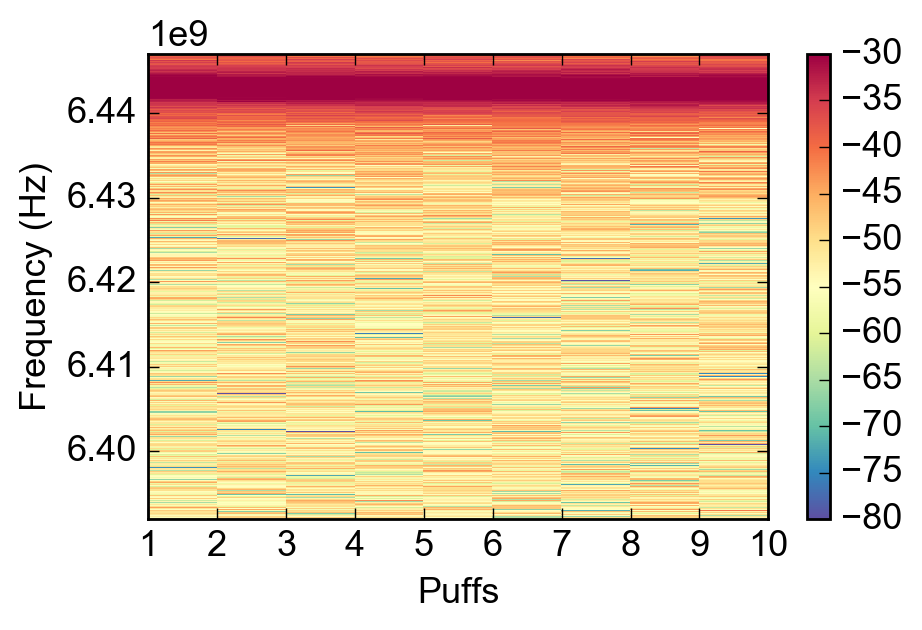

In [5]:
filepath = r"/Volumes/slab/_Data/170522 - M018V6 Helium Curves in Breton/data"
filenames = [r"170522/221955_helium_curve/00000_helium_curve.h5"]

f0s, Qs, Puffs = list(), list(), list()

for filename in filenames:
    with h5py.File(os.path.join(filepath, filename)) as f:
        for step in f.keys():
            print(step,)
            vars()[step] = f[step][()]
            
    fig = plt.figure(figsize=(5,3.))
    common.configure_axes(13)
    plt.pcolormesh(puffs, fpts[0,:], mags.T, cmap=plt.cm.Spectral_r, vmin=-80, vmax=-30)
    plt.xlabel("Puffs")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar()
    plt.xlim(np.min(puffs), np.max(puffs))
    plt.ylim(np.min(fpts[0,:]), np.max(fpts[0,:]))

    #common.save_figure(fig, save_path=filepath)
    
    F, Q = get_f0s(fpts, mags)
    
    for x in F:
        f0s.append(x)
        
    for q in Q:
        Qs.append(q)
        
    for p in puffs:
        Puffs.append(p)

In [6]:
print(np.shape(f0s), np.shape(Qs), np.shape(Puffs))

(134,) (134,) (134,)


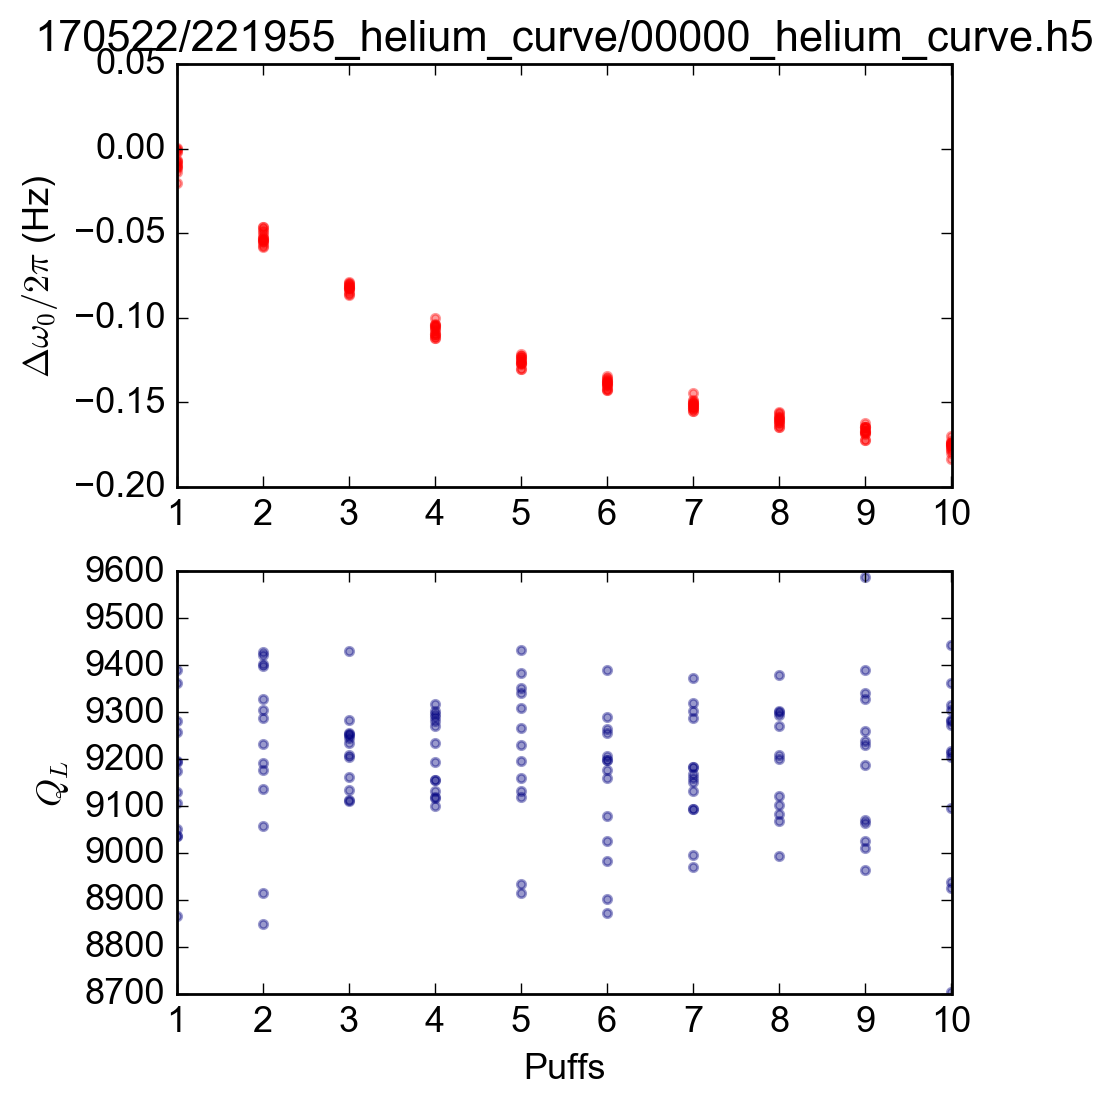

In [10]:
fig = plt.figure(figsize=(5, 6.))
common.configure_axes(13)
plt.subplot(211)
plt.title(filenames[-1])
plt.plot(Puffs, (np.array(f0s).flatten() - f0s[0])/1E6, 'o', **common.plot_opt('red', msize=3))
plt.ylabel("$\Delta \omega_0/2\pi$ (Hz)")
#plt.ylim(-38,-35)
#plt.ylim(6.404E9, 6.406E9)

plt.subplot(212)
plt.plot(Puffs, Qs, 'o', **common.plot_opt('navy', msize=3))
plt.ylabel("$Q_L$")
plt.xlabel("Puffs")

common.save_figure(fig, save_path=filepath)

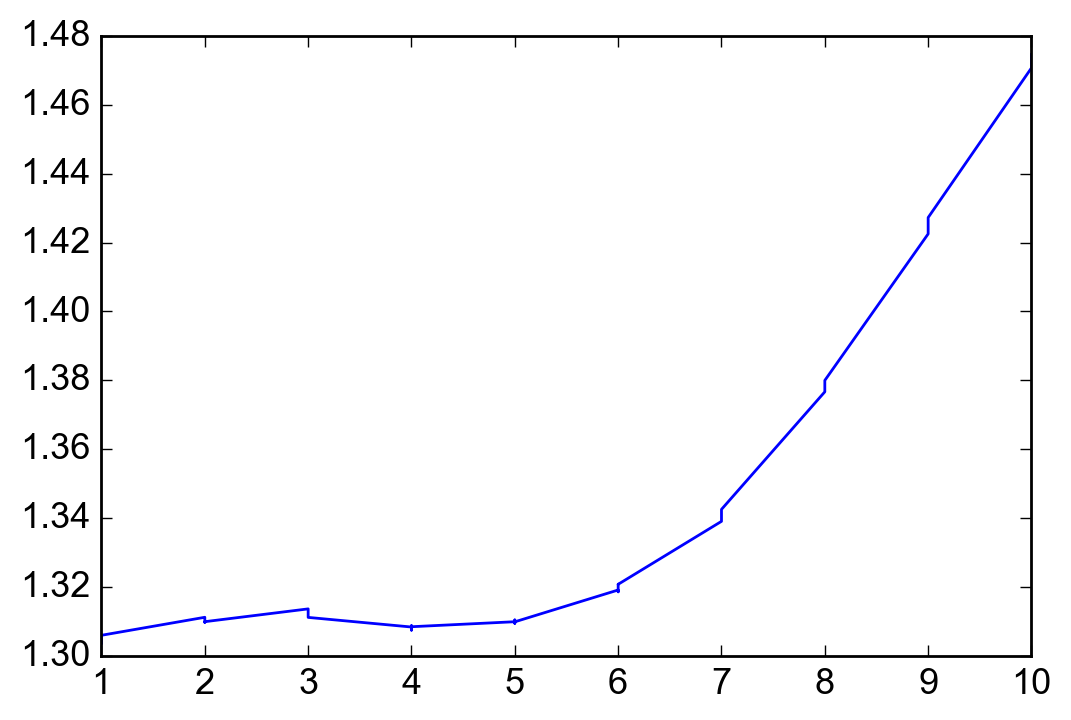

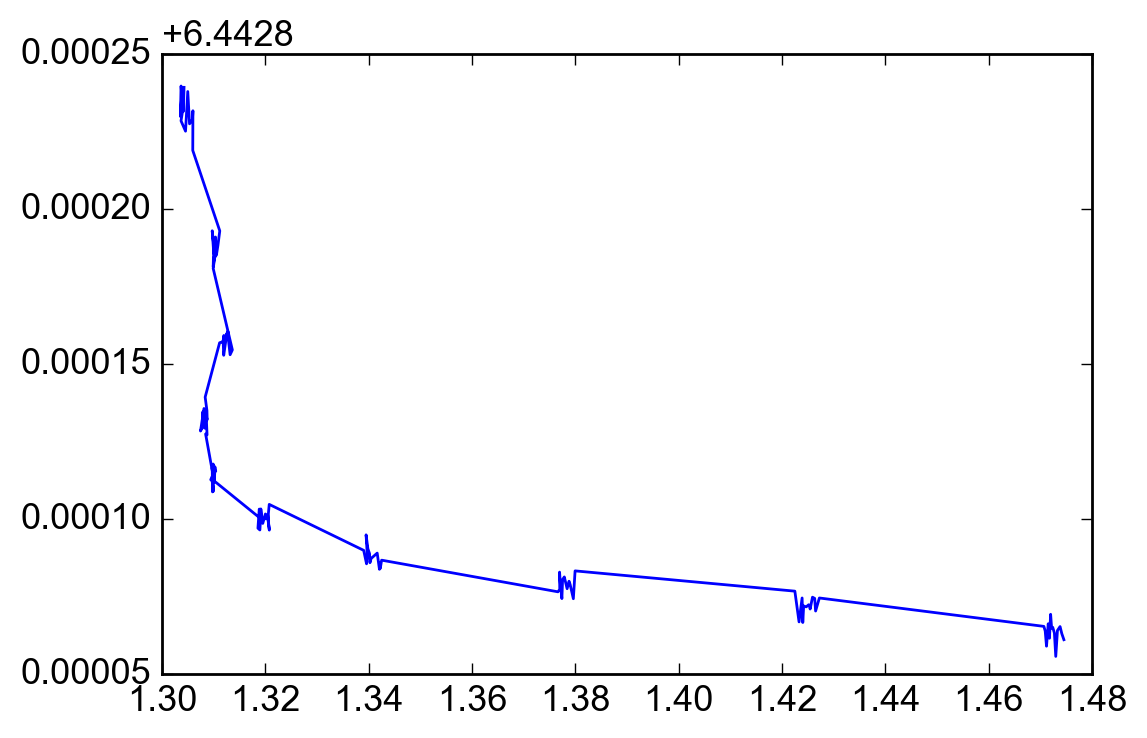

In [17]:
plt.plot(puffs, temperature)
plt.figure()
plt.plot(temperature, np.array(f0s)/1e9)

In [8]:
print("Final frequency shift is %.3f MHz"%((f0s[0]-f0s[-1])/1E6))

Final frequency shift is 0.178 MHz


In [6]:
filepath = r"/Volumes/slab/_Data/170522 - M018V6 Helium Curves in Breton/data/170524"
filenames = [r"100100_batch3_pinch_n_guards_grounded_warmup/batch3_pinch_n_guards_grounded_warmup.h5"]

f0s, Qs, Puffs = list(), list(), list()

for filename in filenames:
    with h5py.File(os.path.join(filepath, filename)) as f:
        for step in f.keys():
            print(step,)
            vars()[step] = f[step][()]
                
    F, Q = get_f0s(fpoints, mags)
    
    for x in F:
        f0s.append(x)
        
    for q in Q:
        Qs.append(q)

 12%|█▏        | 75/646 [00:00<00:01, 346.23it/s]

averages
fpoints
mags
phases
powers
temperature


100%|██████████| 646/646 [00:00<00:00, 723.18it/s]


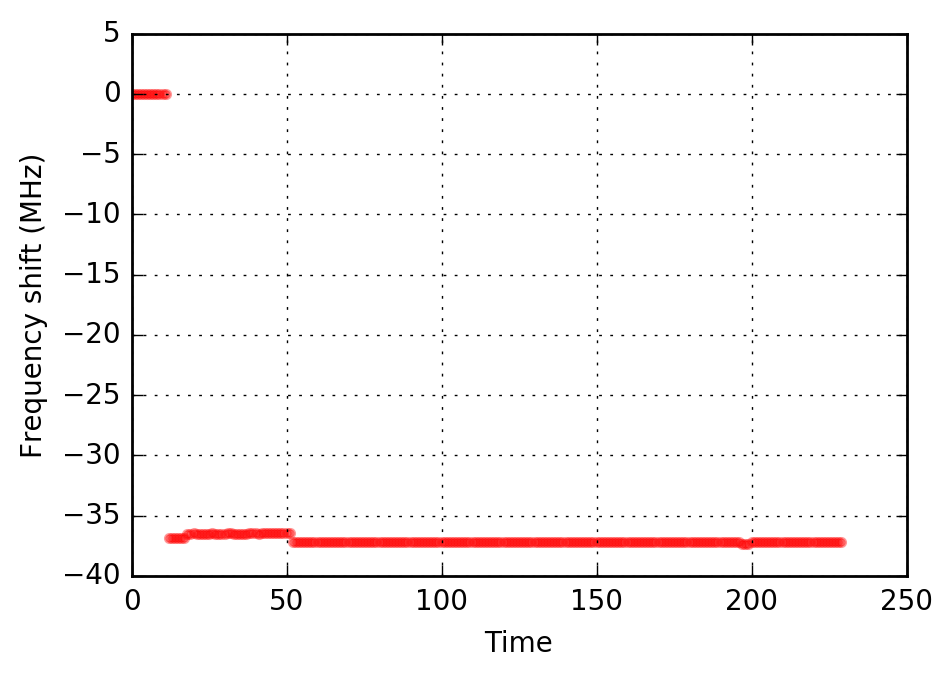

In [25]:
compare = np.where(temperature < 0.97)[0]
plt.figure(figsize=(5.,3.5))
plt.plot((np.array(f0s)[compare] - f0s[0])/1E6, 'o', **common.plot_opt('r', msize=3))
plt.ylabel("Frequency shift (MHz)")
plt.xlabel("Time")
plt.grid()

In [26]:
print("Final frequency shift is %.3f MHz"%((f0s[0]-f0s[-1])/1E6))

Final frequency shift is 38.487 MHz


# Small sample box without wirebonds

In [35]:
filepath = r"/Volumes/slab/_Data/170522 - M018V6 Helium Curves in Breton/data/170526"
filenames = [r"160338_batch3_pinch_n_guards_grounded_warmup/batch3_pinch_n_guards_grounded_warmup.h5"]

f0s, Qs, Puffs = list(), list(), list()

for filename in filenames:
    with h5py.File(os.path.join(filepath, filename)) as f:
        for step in f.keys():
            print(step,)
            vars()[step] = f[step][()]
    
    F, Q = get_f0s(fpoints, mags, span=25E6)
    
    for x in F:
        f0s.append(x)
        
    for q in Q:
        Qs.append(q)

 26%|██▌       | 75/289 [00:00<00:00, 350.31it/s]

averages
fpoints
mags
phases
powers
temperature
Fit failed!


 90%|████████▉ | 259/289 [00:00<00:00, 311.67it/s]

Fit failed!
Fit failed!
Fit failed!


100%|██████████| 289/289 [00:01<00:00, 142.59it/s]


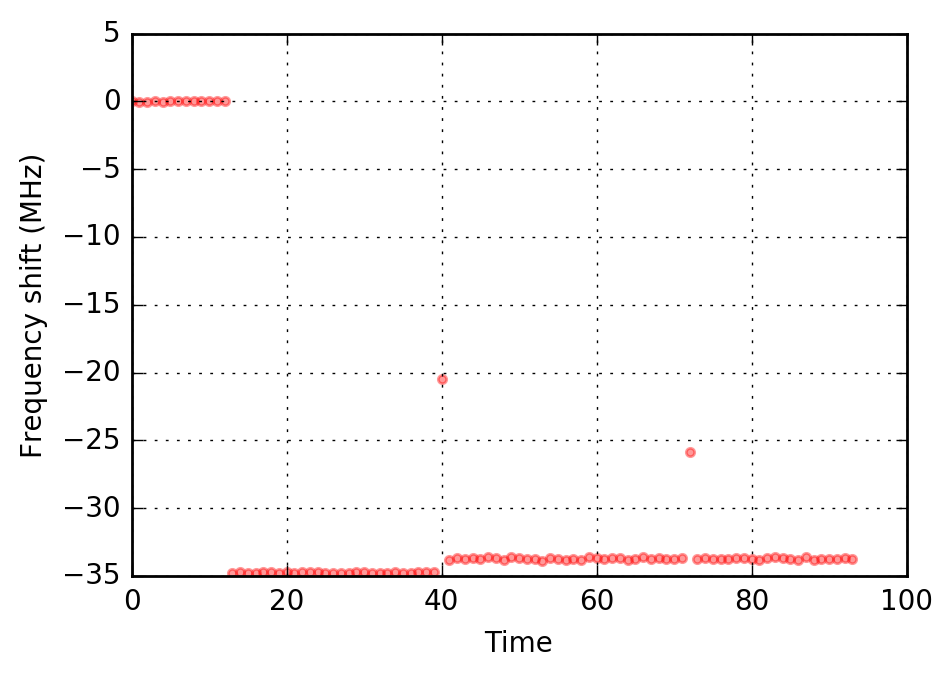

In [38]:
compare = np.where(temperature < 1.50)[0]
plt.figure(figsize=(5.,3.5))
plt.plot((np.array(f0s)[compare] - f0s[0])/1E6, 'o', **common.plot_opt('r', msize=3))
plt.ylabel("Frequency shift (MHz)")
plt.xlabel("Time")
plt.grid()

# Theory calculations

### Vary the third layer etch thickness

Fit function: y = a0 + a1*x + a2*x**3 + ...
===========  ===================  ==================
Parameter           Value                Std
===========  ===================  ==================
a0           -21.722423986040866  0.732585334510321
a1            -58.9380747467184   2.5582209673474163
===========  ===================  ==================


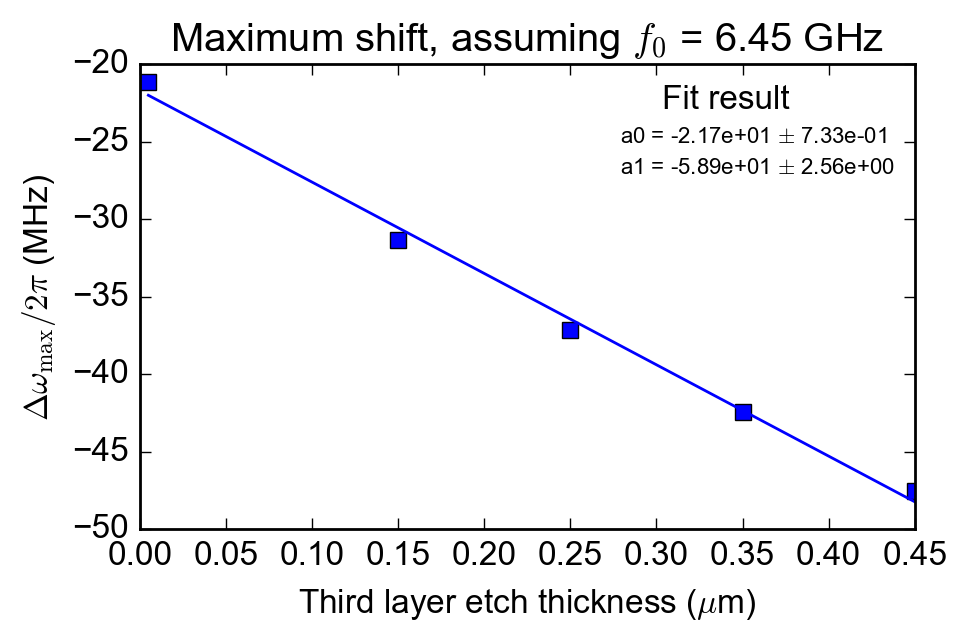

In [89]:
L3_depths = [0.450,0.350,0.250,0.150,0.005]
dimensionless_shift = [-0.00737,-0.00658,-0.00576,-0.00486,-0.00328]
shift = np.array(dimensionless_shift)*6.45*1E3

fig = plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.plot(L3_depths, shift, 's')

fr, ferr = kfit.fit_poly(L3_depths, shift, fitparams=[-20, -5])
plt.plot(L3_depths, kfit.polyfunc(np.array(L3_depths), *fr), '-b')
plt.xlabel("Third layer etch thickness ($\mu$m)")
plt.ylabel("$\Delta \omega_\mathrm{max}/2\pi$ (MHz)")
plt.title("Maximum shift, assuming $f_0$ = 6.45 GHz")

common.save_figure(fig, save_path="/Users/gkoolstra/Google Drive/grad school/schuster lab/notes/Pictures")

### Vary the dielectric constant of Si

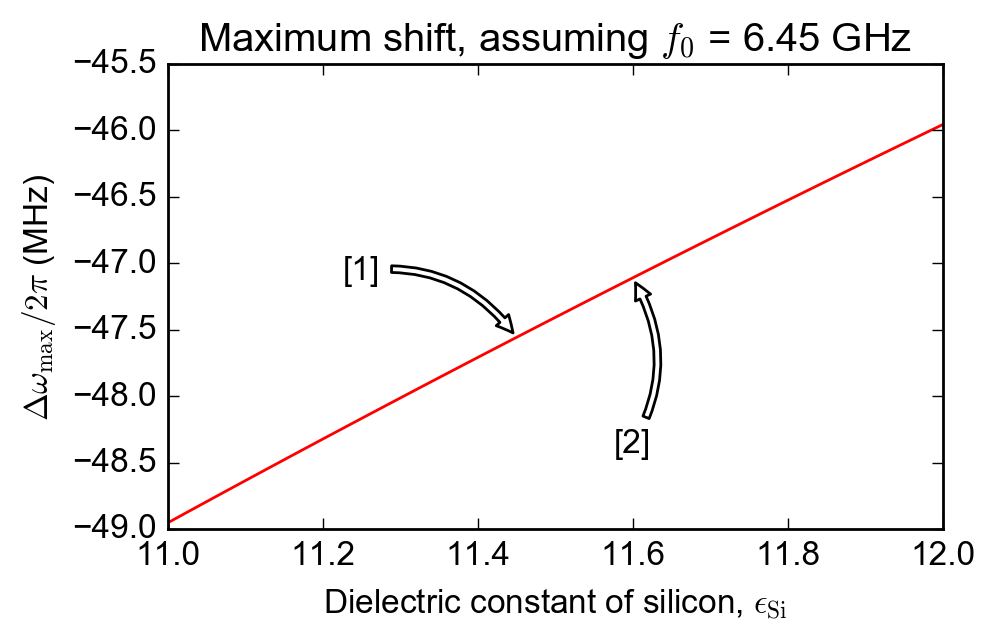

In [106]:
def helium_shift(p_He, p_vac_tot, p_Si, f0, eps_silicon):
    # The numerator has the fraction of the efield that is in the helium. Whatever part of the Efield is in the
    # helium cannot be in the vacuum, so we subtract it. The denominator contains the sum of all the regions, 
    # without any dielectric constants. We don't include the _all_helium because we would count it twice (it is 
    # already in the _all_vacuum suffix)
    #enew = ((p_vac_tot-Esquared_all_helium) + 1.056*Esquared_all_helium + 11.45*Esquared_all_silicon)\
    #/(Esquared_all_silicon + Esquared_all_vacuum)
    #eold = enew[0]
    eps_vacuum = 1
    eps_helium = 1.056
    eps_ratio = (p_Si*eps_silicon + p_vac_tot*eps_vacuum + p_He*(eps_helium-eps_vacuum))/\
    (p_Si*eps_silicon + p_vac_tot*eps_vacuum)
    return -f0 * (1-eps_ratio**(-0.5))

eps_si = np.linspace(11, 12, 101)

fig = plt.figure(figsize=(5.,3.))
common.configure_axes(12)

plt.plot(eps_si, helium_shift(1.9268, 1.9268, 0.4637, 6.45E3, eps_si), 'r')
plt.xlim(np.min(eps_si), np.max(eps_si))
plt.xlabel("Dielectric constant of silicon, $\epsilon_\mathrm{Si}$")
plt.ylabel("$\Delta \omega_\mathrm{max}/2\pi$ (MHz)")
plt.title("Maximum shift, assuming $f_0$ = 6.45 GHz")

plt.annotate("[1]",
            xy=(11.45, helium_shift(1.9268, 1.9268, 0.4637, 6.45E3, 11.45)), xycoords='data',
            xytext=(11.45-0.2, helium_shift(1.9268, 1.9268, 0.4637, 6.45E3, 11.45) + 0.5), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.3", 
                           facecolor='white'), 
            )

plt.annotate("[2]",
            xy=(11.60, helium_shift(1.9268, 1.9268, 0.4637, 6.45E3, 11.60)), xycoords='data',
            xytext=(11.60, helium_shift(1.9268, 1.9268, 0.4637, 6.45E3, 11.60) - 1.25), textcoords='data',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3", 
                           facecolor='white'), 
            )


common.save_figure(fig, save_path="/Users/gkoolstra/Google Drive/grad school/schuster lab/notes/Pictures")

### Vary the etch angle of the third layer etch

Fit function: y = a0 + a1*x + a2*x**3 + ...
===========  ====================  ====================
Parameter           Value                  Std
===========  ====================  ====================
a0           -15.083629119719806    0.7163569081393514
a1           -0.35932655437778754  0.008919686651438151
===========  ====================  ====================
Fit function: y = a0 + a1*x + a2*x**3 + ...
===========  ===================  ===================
Parameter           Value                 Std
===========  ===================  ===================
a0           -17.238633358188252  0.7818500878537091
a1           -0.2797938306958372  0.00972261839564205
===========  ===================  ===================


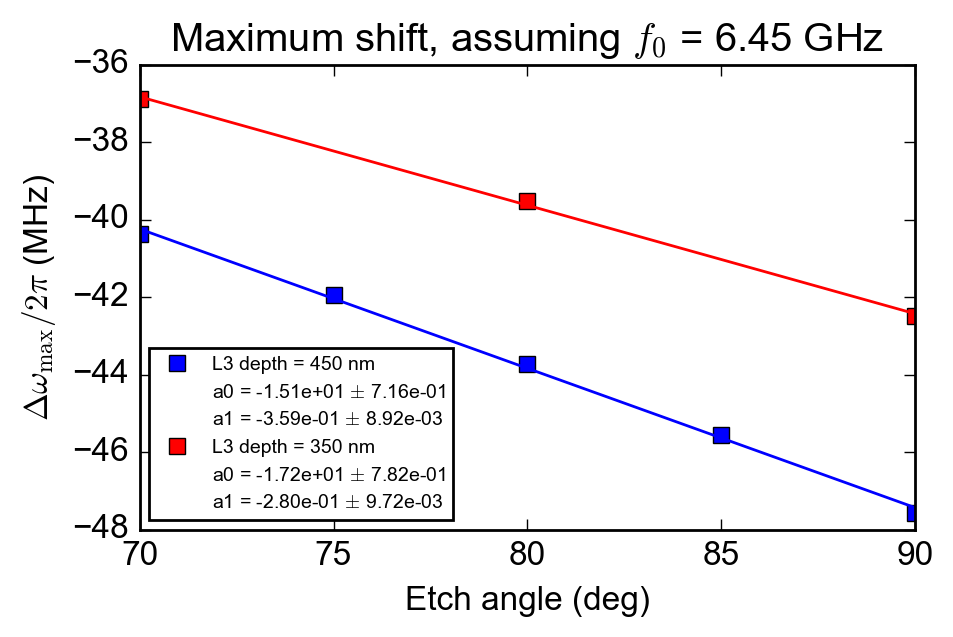

In [109]:
# Dataset for L3_etch_T = 450 nm // channel_depth = 1100 nm
p_Si = [0.4637, 0.4843, 0.5041, 0.5249, 0.5448]
p_vac_tot = [1.9268, 1.8966, 1.8692, 1.8419, 1.8177]
angle_450 = 90-np.array([0, 5, 10, 15, 20])
shift_450 = helium_shift(np.array(p_vac_tot), np.array(p_vac_tot), np.array(p_Si), 6.45E3, 11.45)

fig=plt.figure(figsize=(5.,3.))
common.configure_axes(12)

plt.plot(angle_450, shift_450, 'sb', label='L3 depth = 450 nm')
fr, ferr = kfit.fit_poly(angle_450, shift_450, fitparams=[-40, 5])
plt.plot(angle_450, kfit.polyfunc(np.array(angle_450), *fr), '-b')

plt.xlabel("Etch angle (deg)")
plt.ylabel("$\Delta \omega_\mathrm{max}/2\pi$ (MHz)")
plt.title("Maximum shift, assuming $f_0$ = 6.45 GHz")

# Dataset for L3_etch_T = 350 nm // channel_depth = 1100 nm
p_Si = [0.5152, 0.5497, 0.5839]
p_vac_tot = [1.8378, 1.7835, 1.7343]
angle_350 = 90-np.array([0, 10, 20])
shift_350 = helium_shift(np.array(p_vac_tot), np.array(p_vac_tot), np.array(p_Si), 6.45E3, 11.45)

plt.plot(angle_350, shift_350, 'sr', label='L3 depth = 350 nm')
fr, ferr = kfit.fit_poly(angle_350, shift_350, fitparams=[-40, 5])
plt.plot(angle_350, kfit.polyfunc(np.array(angle_350), *fr), '-r')

plt.legend(loc=3, prop={"size" : 7}, numpoints=1)
plt.ylim(-48, -36)

#common.save_figure(fig, save_path="/Users/gkoolstra/Google Drive/grad school/schuster lab/notes/Pictures")

In [113]:
helium_shift(1.8416, 1.8416, 0.5254, 6.45E3, 11.45)

-41.91629766268539

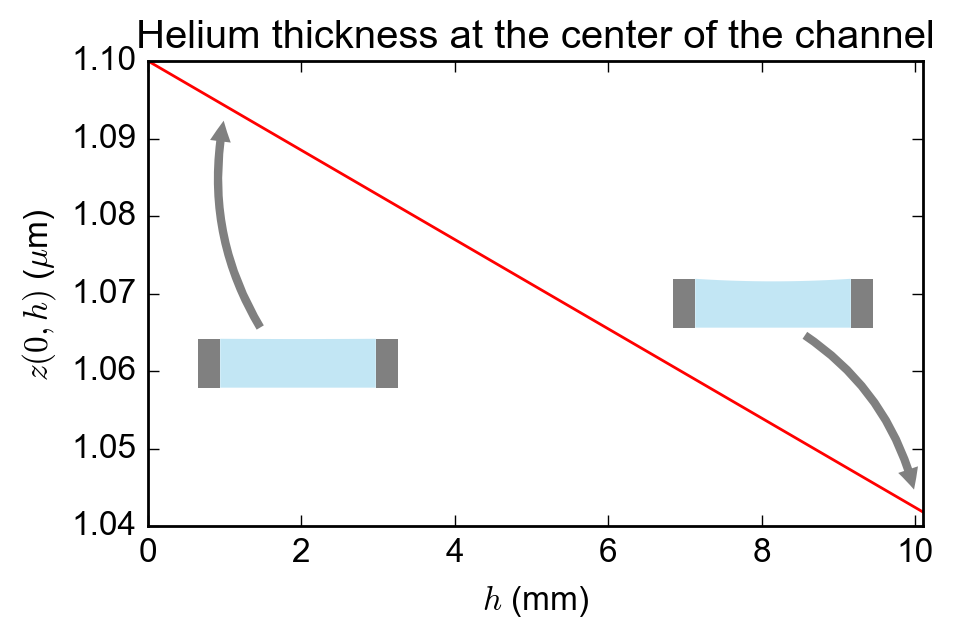

In [202]:
rho = 145
g = 9.81
h = np.linspace(10.1E-3, 0, 101)
sigma = 3.78E-4
d0 = 1.1E-6
w = 3.5E-6
x = np.linspace(-w/2., w/2., 101)

def z_theory(x, h):
    return rho*g*h/(2*sigma)*(x**2 - w**2/4.) + d0

def center_thickness(h):
    ctr = d0 - rho*g*h*w**2/(8*sigma)
    ctr[ctr<0] = 0
    return ctr

fig = plt.figure(figsize=(5.,3.))
common.configure_axes(12)
plt.plot(h*1E3, center_thickness(h)*1E6, '-r')
plt.xlabel("$h$ (mm)")
plt.ylabel("$z(0,h)$ ($\mu$m) ")
plt.title("Helium thickness at the center of the channel")
plt.annotate("",
            xy=(10, 1.044), xycoords='data',
            xytext=(8.5, 1.065), textcoords='data',
            size=15, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple", 
                            facecolor='gray', 
                            edgecolor='none',
                            connectionstyle="arc3,rad=-0.2"), 
            )

plt.annotate("",
            xy=(1, 1.093), xycoords='data',
            xytext=(1.5, 1.065), textcoords='data',
            size=15, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple", 
                            facecolor='gray', 
                            edgecolor='none', 
                            connectionstyle="arc3,rad=-0.2"), 
            )

plt.xlim(0, 10.1)

a = plt.axes([.65, .4, .2, .2])
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.fill_between(x, z_theory(x, 10E-3), y2=0, facecolor='skyblue', edgecolor='none', alpha=0.5)
plt.fill_between([-w/2.- 5E-6, -w/2.], [d0, d0], y2=0, facecolor='gray', edgecolor='none',alpha=1.0)
plt.fill_between([w/2, w/2.+5E-6], [d0, d0], y2=0, facecolor='gray', edgecolor='none',alpha=1.0)
plt.xlim(-w/2. - 0.5E-6, w/2. + 0.5E-6)
plt.ylim(0, d0 + 0.1E-6)
a.set_aspect('equal', 'datalim')

b = plt.axes([.175, .3, .2, .2])
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.fill_between(x, z_theory(x, 1E-3), y2=0, facecolor='skyblue', edgecolor='none', alpha=0.5)
plt.fill_between([-w/2.- 5E-6, -w/2.], [d0, d0], y2=0, facecolor='gray', edgecolor='none',alpha=1.0)
plt.fill_between([w/2, w/2.+5E-6], [d0, d0], y2=0, facecolor='gray', edgecolor='none',alpha=1.0)
plt.xlim(-w/2. - 0.5E-6, w/2. + 0.5E-6)
plt.ylim(0, d0 + 0.1E-6)
b.set_aspect('equal', 'datalim')

common.save_figure(fig, save_path="/Users/gkoolstra/Google Drive/grad school/schuster lab/notes/Pictures")